# ASSIGNMENT 2


*   Shashwat Raj (2021MT10259)
*   Advait Rege (2021MT60946)
*   Ishav Singla (2021MT10889)



**Problem Statement :**
Use MNIST Handwritten digits DATASET
(a) Implement
  (1) Decision Tree,
  (2) Random Forest,
  (3) Naïve Bayes Classifier,
  (4) KNN classifier
  (5) Neural Network classifier
compare the performances using k-fold cross validation and other tuning techniques to do multi-class classification where the idea is to classify the image to one of the ten digits (0-9).

(b)  Exploration of Different Evaluation Metrics. Evaluate your methods using different evaluation metrics.  

(C )  Parameter Tuning through Grid Search/Cross Validation  
Tune the parameters using  two powerful techniques of grid search and
parameter search.

#Loading the Data and splitting it into train and test data

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Load the dataset
digits = load_digits()

# Split the data into features and labels
X = digits.data
y = digits.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Implementing and Evaluating various Classifiers

**1. Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()


**2. Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()


**3. Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()


**4. KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()


**5. Neural Network Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier

nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)


**Implement k-fold Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

classifiers = [dt_classifier, rf_classifier, nb_classifier, knn_classifier, nn_classifier]
cv_scores = []

for classifier in classifiers:
    scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Print cross-validation scores
for i, score in enumerate(cv_scores):
    print(f"Classifier {i+1}: {score}")


Classifier 1: 0.8475875919473481
Classifier 2: 0.9749516066589237
Classifier 3: 0.8295489740611692
Classifier 4: 0.9825953348819203
Classifier 5: 0.9693742740998837


**Exploration of Different Evaluation Metrics**

In [ ]:
from sklearn.metrics import classification_report

# Fit classifiers on the training data
for classifier in classifiers:
    classifier.fit(X_train, y_train)

# Evaluate on the test set
for i, classifier in enumerate(classifiers):
    y_pred = classifier.predict(X_test)
    print(f"Classifier {i+1} Evaluation:")
    print(classification_report(y_test, y_pred))


Classifier 1 Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        33
           1       0.85      0.79      0.81        28
           2       0.85      0.70      0.77        33
           3       0.83      0.88      0.86        34
           4       0.72      0.91      0.81        46
           5       0.93      0.91      0.92        47
           6       0.87      0.94      0.90        35
           7       0.86      0.88      0.87        34
           8       0.80      0.67      0.73        30
           9       0.85      0.85      0.85        40

    accuracy                           0.85       360
   macro avg       0.86      0.84      0.85       360
weighted avg       0.86      0.85      0.85       360

Classifier 2 Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00     

**Parameter Tuning through Grid Search/Cross Validation**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
param_grid_rf = {'n_estimators': [50, 100, 150],
                 'max_depth': [None, 10, 20]}

param_grid_nn = {'hidden_layer_sizes': [(50,), (100,), (200,)],
                 'max_iter': [200, 400, 600]}

# Grid search for Random Forest
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
print("Random Forest Best Parameters:", grid_search_rf.best_params_)

# Grid search for Neural Network
grid_search_nn = GridSearchCV(nn_classifier, param_grid_nn, cv=5, scoring='accuracy')
grid_search_nn.fit(X_train, y_train)
print("Neural Network Best Parameters:", grid_search_nn.best_params_)


Random Forest Best Parameters: {'max_depth': 20, 'n_estimators': 150}
Neural Network Best Parameters: {'hidden_layer_sizes': (200,), 'max_iter': 600}


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_comparison(scores, labels, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=labels, y=scores, palette="viridis")
    plt.title(title)
    plt.xlabel("Classifier")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.show()


<ipython-input-10-55d235a78205>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=scores, palette="viridis")


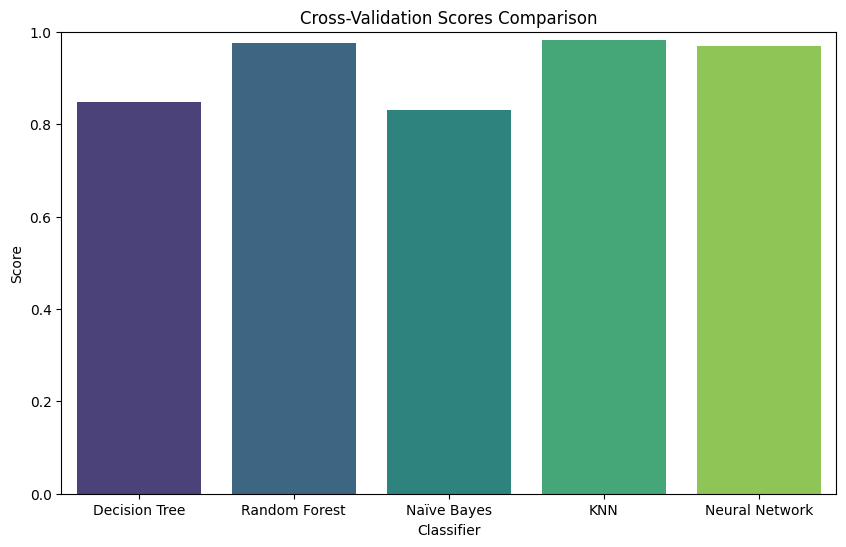

In [ ]:
# Plot cross-validation scores comparison
plot_comparison(cv_scores, ["Decision Tree", "Random Forest", "Naïve Bayes", "KNN", "Neural Network"],
                "Cross-Validation Scores Comparison")


<ipython-input-10-55d235a78205>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=scores, palette="viridis")


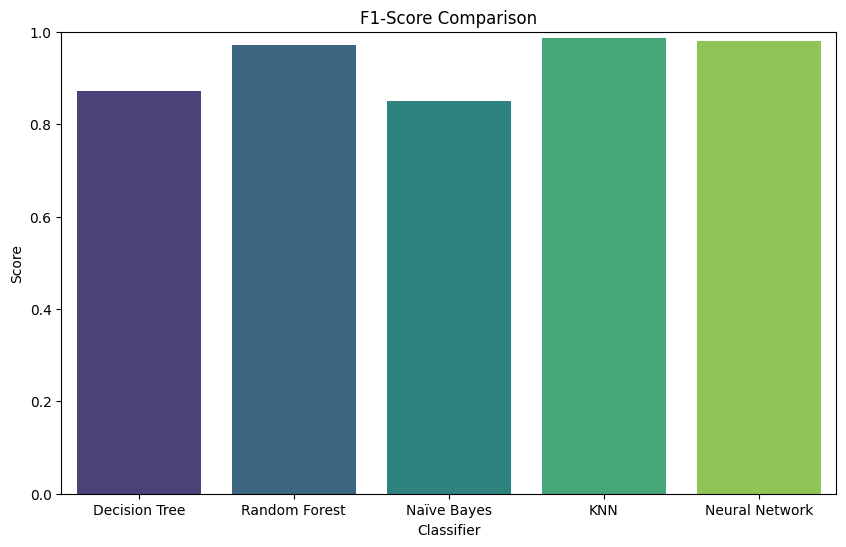

In [ ]:
from sklearn.metrics import f1_score

# Calculate F1-score for each classifier
f1_scores = []
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Plot F1-score comparison
plot_comparison(f1_scores, ["Decision Tree", "Random Forest", "Naïve Bayes", "KNN", "Neural Network"],
                "F1-Score Comparison")


**Conclusion and Insights**

*   From the cross-validation scores comparison, we can observe the performance of different classifiers on average over various folds of the training data.
*   Comparing evaluation metrics like F1-score provides insight into how well the classifiers perform on the test set.
* Based on these comparisons, we can choose the best-performing classifier for our specific task. For example, if we prioritize accuracy, we might choose the Random Forest classifier, while for tasks where precision and recall are crucial, the Neural Network might be a better choice.
* Parameter tuning using grid search and cross-validation can further enhance the performance of the selected classifier. We can visualize the impact of different parameters on the performance metrics to fine-tune our models.






In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define the range of values for max_depth and n_neighbors
param_grid_dt = {
    'max_depth': [3, 5, 7, 10]
}
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10]
}
# Decision Tree Classifier
dt = DecisionTreeClassifier()

# KNN Classifier
knn = KNeighborsClassifier()

# GridSearch for Decision Tree
dt_grid_search = GridSearchCV(dt, param_grid_dt, cv=5)
dt_grid_search.fit(X_train, y_train)

# GridSearch for KNN
knn_grid_search = GridSearchCV(knn, param_grid_knn, cv=5)
knn_grid_search.fit(X_train, y_train)

# Best parameters for Decision Tree
print("Best parameters for Decision Tree:", dt_grid_search.best_params_)

# Best parameters for KNN
print("Best parameters for KNN:", knn_grid_search.best_params_)


Best parameters for Decision Tree: {'max_depth': 10}
Best parameters for KNN: {'n_neighbors': 3}


In [ ]:
"""
Random Forest Best Parameters:{'max_depth': 20, 'n_estimators': 150}
Neural Network Best Parameters:{'hidden_layer_sizes': (200,), 'max_iter': 600}
Best parameters for Decision Tree:{'max_depth': 10}
Best parameters for KNN:{'n_neighbors': 3}
"""

"\nRandom Forest Best Parameters:{'max_depth': 20, 'n_estimators': 150}\nNeural Network Best Parameters:{'hidden_layer_sizes': (200,), 'max_iter': 600}\nBest parameters for Decision Tree:{'max_depth': 10}\nBest parameters for KNN:{'n_neighbors': 3}\n"

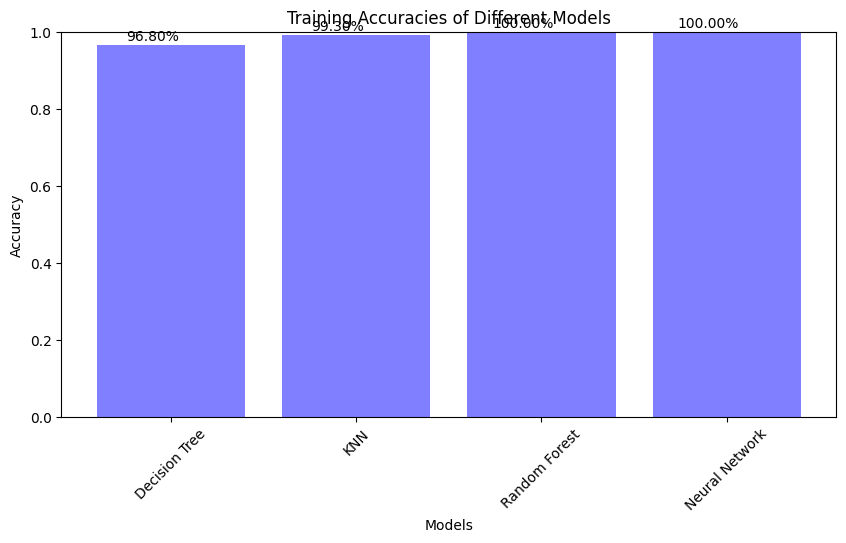

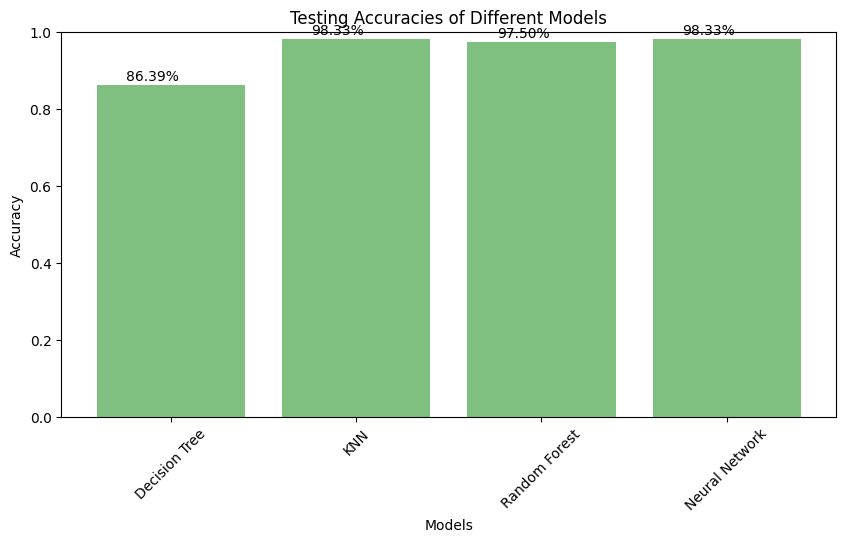

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Define best hyperparameters
best_dt_max_depth = 10
best_knn_k = 3
best_rf_max_depth = 20
best_rf_n_estimators = 150
best_nn_hidden_layer_size = (200,)
best_nn_max_iter = 600

# Initialize classifiers with best hyperparameters
dt_classifier = DecisionTreeClassifier(max_depth=best_dt_max_depth)
knn_classifier = KNeighborsClassifier(n_neighbors=best_knn_k)
rf_classifier = RandomForestClassifier(max_depth=best_rf_max_depth, n_estimators=best_rf_n_estimators)
nn_classifier = MLPClassifier(hidden_layer_sizes=best_nn_hidden_layer_size, max_iter=best_nn_max_iter)

# Train classifiers on training data
dt_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
nn_classifier.fit(X_train, y_train)

# Predict on training data
dt_train_pred = dt_classifier.predict(X_train)
knn_train_pred = knn_classifier.predict(X_train)
rf_train_pred = rf_classifier.predict(X_train)
nn_train_pred = nn_classifier.predict(X_train)

# Predict on test data
dt_test_pred = dt_classifier.predict(X_test)
knn_test_pred = knn_classifier.predict(X_test)
rf_test_pred = rf_classifier.predict(X_test)
nn_test_pred = nn_classifier.predict(X_test)

# Calculate accuracies
dt_train_accuracy = accuracy_score(y_train, dt_train_pred)
knn_train_accuracy = accuracy_score(y_train, knn_train_pred)
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
nn_train_accuracy = accuracy_score(y_train, nn_train_pred)

dt_test_accuracy = accuracy_score(y_test, dt_test_pred)
knn_test_accuracy = accuracy_score(y_test, knn_test_pred)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)
nn_test_accuracy = accuracy_score(y_test, nn_test_pred)

# Plot comparison
models = ['Decision Tree', 'KNN', 'Random Forest', 'Neural Network']
train_accuracies = [dt_train_accuracy, knn_train_accuracy, rf_train_accuracy, nn_train_accuracy]
test_accuracies = [dt_test_accuracy, knn_test_accuracy, rf_test_accuracy, nn_test_accuracy]

# Plot training accuracies with percentages
plt.figure(figsize=(10, 5))
bars = plt.bar(models, train_accuracies, color='blue', alpha=0.5)


for bar, accuracy in zip(bars, train_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{accuracy*100:.2f}%', ha='center', color='black')

plt.title('Training Accuracies of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limit to ensure consistent scaling
plt.show()

# Plot testing accuracies with percentages
plt.figure(figsize=(10, 5))
bars = plt.bar(models, test_accuracies, color='green', alpha=0.5)


for bar, accuracy in zip(bars, test_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{accuracy*100:.2f}%', ha='center', color='black')

plt.title('Testing Accuracies of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limit to ensure consistent scaling
plt.show()

